In [92]:
import numpy as np
import pandas as pd
import matplotlib
import pylab
import glob
import dicom
import cv2
import os
import matplotlib.pyplot as plt
from skimage import data, io, filters

from IPython.display import HTML
import matplotlib.animation as animation

%matplotlib nbagg
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (10.0, 10.0)
%config InlineBackend.figure_format = 'retina'

In [80]:
labels = pd.read_csv('../../stage1_labels.csv')
labels.head()
labels[labels['id'] == '0d941a3ad6c889ac451caf89c46cb92a'] # No Cancer

,id,cancer
71,0d941a3ad6c889ac451caf89c46cb92a,0


In [101]:
paths = glob.glob(os.path.join('*'))
labels[[s in paths for s in labels['id']]]

,id,cancer
7,00cba091fa4ad62cc3200a657aeb957e,0
56,0a099f2549429d29b32f349e95fb2244,0
57,0a0c32c9e08cc2ea76a71649de56be6d,0
58,0a38e7597ca26f9374f8ea2770ba870d,0
59,0acbebb8d463b4b9ca88cf38431aac69,1
60,0bd0e3056cbf23a1cb7f0f0b18446068,0
61,0c0de3749d4fe175b7a5098b060982a1,1
62,0c37613214faddf8701ca41e6d43f56e,1
63,0c59313f52304e25d5a7dcf9877633b1,0
64,0c60f4b87afcb3e2dfa65abbbf3ef2f9,1


In [102]:
os.chdir("/Users/ianjohnson/Desktop/data-science-bowl/sample_images/")
print(os.getcwd())
os.chdir('0acbebb8d463b4b9ca88cf38431aac69')
print(os.listdir('.')[:5])
files = os.listdir('.')

imgs = []
for i in files:
    try:
        ds = dicom.read_file(i)
        imgs.append(ds)
    except Exception as e:
        pass

/Users/ianjohnson/Desktop/data-science-bowl/sample_images
['019787df3ae203ec160fb86dbee9275b.dcm', '019f3da5df8ac59c0edd86fe02b5eeea.dcm', '01e74ec28a475f847f63872682dcd9ed.dcm', '0250a177c7e5ebe5ff26c3ec8626cdff.dcm', '04a3caca0aafd373a3b43b1c563d8972.dcm']


In [103]:
#sorting based on InstanceNumber stolen from r4m0n's script: 
imgs.sort(key = lambda x: int(x.InstanceNumber))
full_img = np.stack([s.pixel_array for s in imgs])

In [104]:
bool = full_img[:,2,:] > -2000
full_img[:,2,:][bool]
full_img.shape

(203, 512, 512)

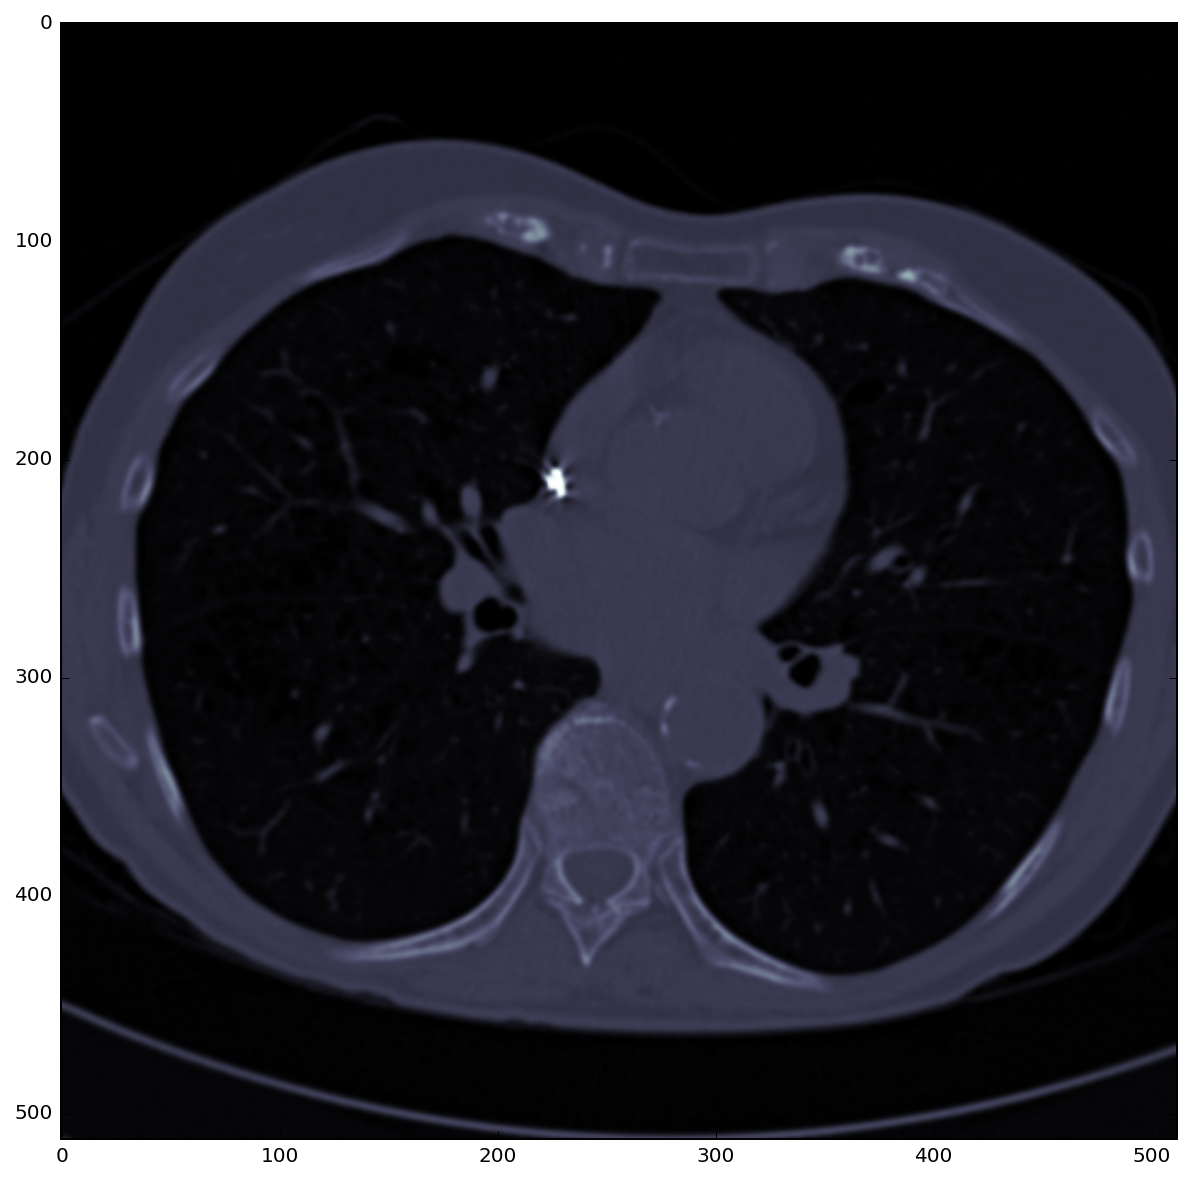

In [110]:
fig = plt.figure()
im = plt.imshow(full_img[100,:,:], cmap=pylab.cm.bone)

In [112]:
imgs_train = np.load("../../ionox0/trainImages.npy").astype(np.float32)
imgs_train.shape

(173, 1, 512, 512)

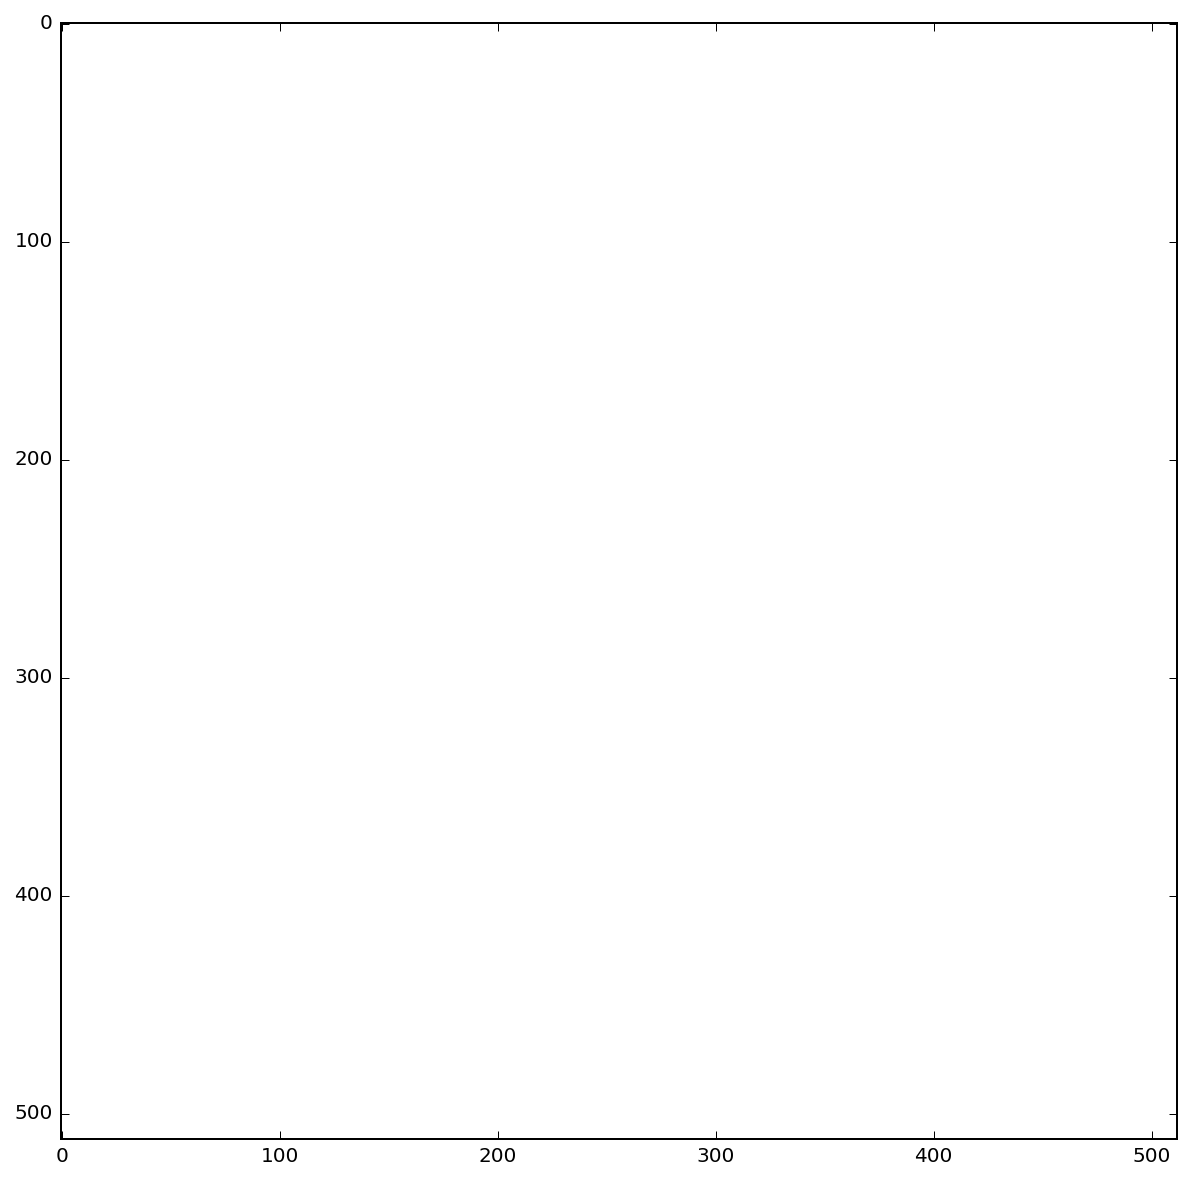

In [114]:
#from https://www.kaggle.com/z0mbie/data-science-bowl-2017/chest-cavity-animation-with-pacemaker
#not working..hmm

fig = plt.figure()
im = plt.imshow(imgs_train[0,0,:,:], cmap=pylab.cm.bone)

# Function to update figure
def updatefig(j):
    # set the data in the axesimage object
    im.set_array(imgs_train[j,0,:,:])
    # return the artists set
    return im,

# Kick off the animation
ani = animation.FuncAnimation(fig, updatefig, frames=range(len(full_img)), 
                              interval=50, blit=True)
# ani.save('Chest_Cavity.gif', writer='imagemagick')
plt.show()

In [ ]:
for i in range(36):
    plt.subplot(6, 6, i + 1)
    plt.imshow(full_img[4 * i, :, :], cmap=plt.cm.bone)    
    plt.xticks([])
    plt.yticks([])

In [ ]:
for i in range(36):
    plt.subplot(6, 6, i + 1)
    img = cv2.resize(full_img[:, 20 + 12 * i, :], (256, 256))
    plt.imshow(img, cmap=plt.cm.bone)
    plt.xticks([])
    plt.yticks([])

In [ ]:
for i in range(36):
    plt.subplot(6,6,i+1)
    img = cv2.resize(full_img[:, :, 20 + 12 * i], (256, 256))
    plt.imshow(img, cmap=plt.cm.bone)
    plt.xticks([])
    plt.yticks([])